In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from babel.numbers import format_currency
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Shark__Tank0.csv')

In [ ]:
df.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,...,Invested Guest Name,All Guest Names,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Ritesh Present,Amit Present,Guest Present
0,1,BluePineFoods,1,1,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Food and Beverage,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
1,1,BoozScooters,1,2,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Vehicles/Electrical Vehicles,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
2,1,HeartUpMySleeves,1,3,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Beauty/Fashion,...,NaN,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
3,1,TagzFoods,2,4,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food and Beverage,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
4,1,HeadAndHeart,2,5,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Children/Education,...,NaN,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0


In [ ]:
df.shape

(597, 80)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              597 non-null    int64  
 1   Startup Name               597 non-null    object 
 2   Episode Number             597 non-null    int64  
 3   Pitch Number               597 non-null    int64  
 4   Season Start               597 non-null    object 
 5   Season End                 478 non-null    object 
 6   Original Air Date          566 non-null    object 
 7   Episode Title              597 non-null    object 
 8   Anchor                     597 non-null    object 
 9   Industry                   597 non-null    object 
 10  Business Description       597 non-null    object 
 11  Company Website            582 non-null    object 
 12  Started in                 430 non-null    float64
 13  Number of Presenters       597 non-null    int64  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              597 non-null    int64  
 1   Startup Name               597 non-null    object 
 2   Episode Number             597 non-null    int64  
 3   Pitch Number               597 non-null    int64  
 4   Season Start               597 non-null    object 
 5   Season End                 478 non-null    object 
 6   Original Air Date          566 non-null    object 
 7   Episode Title              597 non-null    object 
 8   Anchor                     597 non-null    object 
 9   Industry                   597 non-null    object 
 10  Business Description       597 non-null    object 
 11  Company Website            582 non-null    object 
 12  Started in                 430 non-null    float64
 13  Number of Presenters       597 non-null    int64  

In [ ]:
df["Male Presenters"].isnull().sum()

np.int64(66)

In [ ]:
df[['Season Start', 'Season End', 'Original Air Date']]=df[['Season Start', 'Season End', 'Original Air Date']].astype('datetime64[ns]')

In [ ]:
df['Deal Has Conditions'].value_counts()

,count
Deal Has Conditions,
yes,35


In [ ]:
presenter_cols = ['Male Presenters', 'Female Presenters', 'Transgender Presenters']
df[presenter_cols] = df[presenter_cols].fillna(0)

In [ ]:
df['Pitchers City'].fillna('Unknown', inplace=True)
df['Pitchers State'].fillna('Unknown', inplace=True)

In [ ]:
df['Accepted Offer'].fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

,0
Season Number,0
Startup Name,0
Episode Number,0
Pitch Number,0
Season Start,0
...,...
Aman Present,72
Peyush Present,219
Ritesh Present,480
Amit Present,460


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Season Number              597 non-null    int64         
 1   Startup Name               597 non-null    object        
 2   Episode Number             597 non-null    int64         
 3   Pitch Number               597 non-null    int64         
 4   Season Start               597 non-null    datetime64[ns]
 5   Season End                 478 non-null    datetime64[ns]
 6   Original Air Date          566 non-null    datetime64[ns]
 7   Episode Title              597 non-null    object        
 8   Anchor                     597 non-null    object        
 9   Industry                   597 non-null    object        
 10  Business Description       597 non-null    object        
 11  Company Website            582 non-null    object        
 12  Started 

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
Season End,119
Original Air Date,31
Company Website,15
Started in,167
Yearly Revenue,280
Monthly Sales,321
Gross Margin,445
Net Margin,506
EBITDA,534
Cash Burn,504


In [ ]:
print(df['Pitch Number'].max(), "startup companies came for pitching \n")

597 startup companies came for pitching 



In [ ]:
df[['Namita Present','Vineeta Present','Anupam Present','Aman Present','Peyush Present','Ritesh Present','Amit Present','Guest Present']] = df[['Namita Present','Vineeta Present','Anupam Present','Aman Present','Peyush Present','Ritesh Present','Amit Present','Guest Present']].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Season Number              597 non-null    int64         
 1   Startup Name               597 non-null    object        
 2   Episode Number             597 non-null    int64         
 3   Pitch Number               597 non-null    int64         
 4   Season Start               597 non-null    datetime64[ns]
 5   Season End                 478 non-null    datetime64[ns]
 6   Original Air Date          566 non-null    datetime64[ns]
 7   Episode Title              597 non-null    object        
 8   Anchor                     597 non-null    object        
 9   Industry                   597 non-null    object        
 10  Business Description       597 non-null    object        
 11  Company Website            582 non-null    object        
 12  Started 

In [ ]:
df['Company Website'].fillna('Unknown', inplace=True)

# Dropping column with large missing value
columns_to_drop = ['Gross Margin',  'Net Margin','EBITDA', 'Cash Burn', 'SKUs', 'Has Patents' , 'Bootstrapped',   'Part of Match off', 'Season Start',  'Season End', 'Original Air Date','Episode Number']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              597 non-null    int64  
 1   Startup Name               597 non-null    object 
 2   Pitch Number               597 non-null    int64  
 3   Episode Title              597 non-null    object 
 4   Anchor                     597 non-null    object 
 5   Industry                   597 non-null    object 
 6   Business Description       597 non-null    object 
 7   Company Website            597 non-null    object 
 8   Started in                 430 non-null    float64
 9   Number of Presenters       597 non-null    int64  
 10  Male Presenters            597 non-null    float64
 11  Female Presenters          597 non-null    float64
 12  Transgender Presenters     597 non-null    float64
 13  Couple Presenters          597 non-null    int64  

In [ ]:
mean_deal_valuation = df[df['Total Deal Amount'].notnull()]['Deal Valuation'].mean()
df.loc[df['Total Deal Amount'].notnull() & df['Deal Valuation'].isnull(), 'Deal Valuation'] = mean_deal_valuation
df['Deal Valuation'].fillna(0, inplace=True)
df['Deal Valuation'] = df['Deal Valuation'].astype(int)

numeric_cols =['Started in','Yearly Revenue','Monthly Sales']

for col in numeric_cols:
    median_value = df[col].median()  # Calculate the median for the column
    df[col].fillna(median_value, inplace=True)

numeric = df.select_dtypes(include=np.number).columns  # Get all numeric columns

df[numeric] = df[numeric].fillna(0)  # Fill NaN with 0 in numeric columns


In [ ]:
df['Deal Has Conditions'] = df['Deal Has Conditions'].replace({'yes': 1}).fillna(0)
df['Deal Has Conditions'].astype(int)

df['All Guest Names'] = df['All Guest Names'].fillna('No Guest')
df['Invested Guest Name'] = df['Invested Guest Name'].fillna('No Guest Invested')


In [ ]:
print(df.isnull().sum())

Season Number     0
Startup Name      0
Pitch Number      0
Episode Title     0
Anchor            0
                 ..
Aman Present      0
Peyush Present    0
Ritesh Present    0
Amit Present      0
Guest Present     0
Length: 68, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              597 non-null    int64  
 1   Startup Name               597 non-null    object 
 2   Pitch Number               597 non-null    int64  
 3   Episode Title              597 non-null    object 
 4   Anchor                     597 non-null    object 
 5   Industry                   597 non-null    object 
 6   Business Description       597 non-null    object 
 7   Company Website            597 non-null    object 
 8   Started in                 597 non-null    float64
 9   Number of Presenters       597 non-null    int64  
 10  Male Presenters            597 non-null    float64
 11  Female Presenters          597 non-null    float64
 12  Transgender Presenters     597 non-null    float64
 13  Couple Presenters          597 non-null    int64  

In [ ]:
df['Accepted Offer']=df['Accepted Offer'].astype(int)

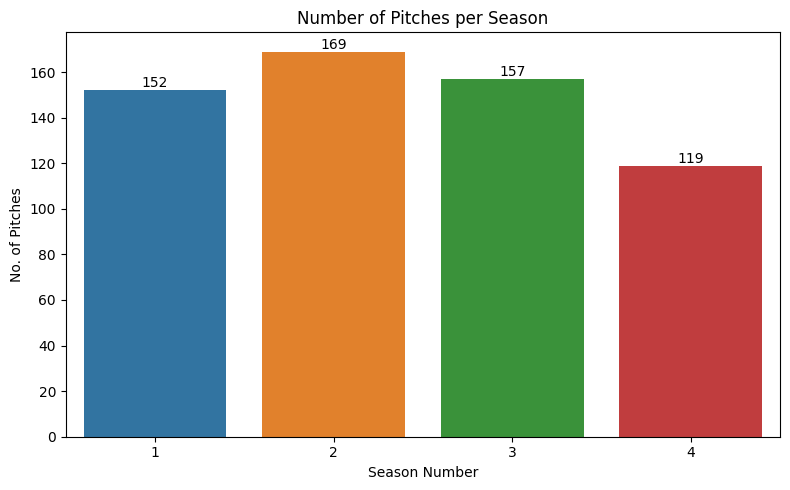

In [ ]:
import matplotlib.pyplot as plt

# Grouping by Season Number and counting unique Pitch Numbers
season_episode_counts = df.groupby('Season Number')['Pitch Number'].nunique().reset_index()

# Plotting
plt.figure(figsize=(8,5))
ax = sns.barplot(data=season_episode_counts, x='Season Number', y='Pitch Number', palette='tab10')

# Setting proper x-tick labels
ax.set_xticks(range(len(season_episode_counts)))
ax.set_xticklabels(season_episode_counts['Season Number'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black')
# Labels and title
plt.xlabel('Season Number')
plt.ylabel('No. of Pitches')
plt.title('Number of Pitches per Season')
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0


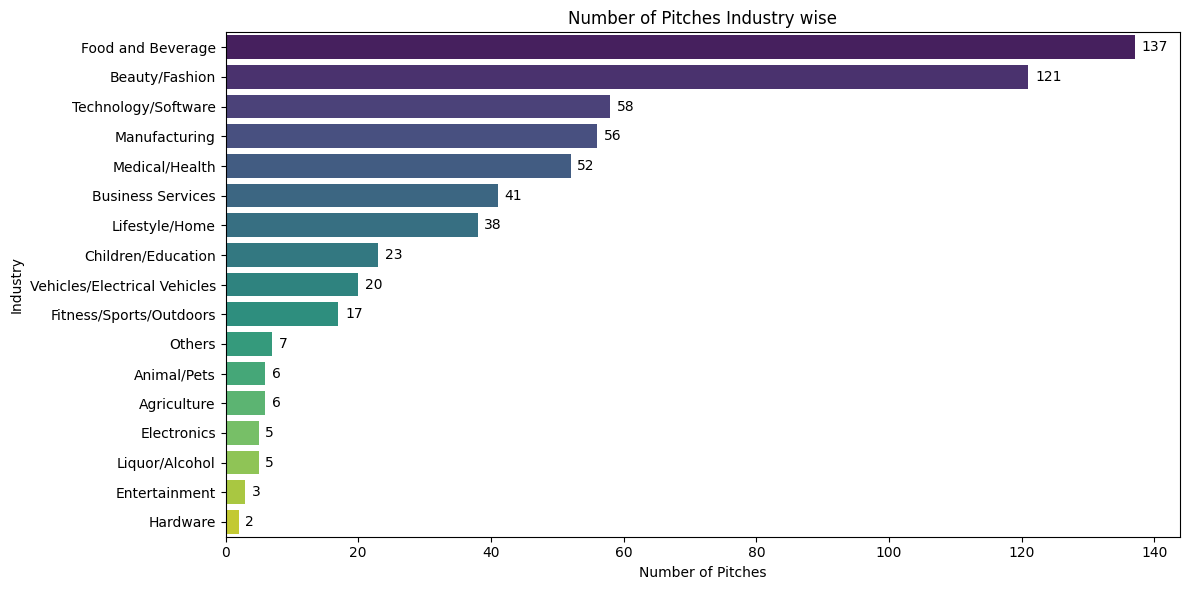

In [ ]:
# Group by 'Industry' and count the number of pitches
industry_pitch_counts = df['Industry'].value_counts().reset_index()
industry_pitch_counts.columns = ['Industry', 'Number of Pitches']

# Sort (optional, for clearer visualization)
industry_pitch_counts = industry_pitch_counts.sort_values(by='Number of Pitches', ascending=False)


# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=industry_pitch_counts, y='Industry', x='Number of Pitches', palette='viridis')

# Add count labels on each bar
for index, row in industry_pitch_counts.iterrows():
    barplot.text(row['Number of Pitches'] + 1, index, row['Number of Pitches'], color='black', va='center')

plt.title('Number of Pitches Industry wise')
plt.xlabel('Number of Pitches')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

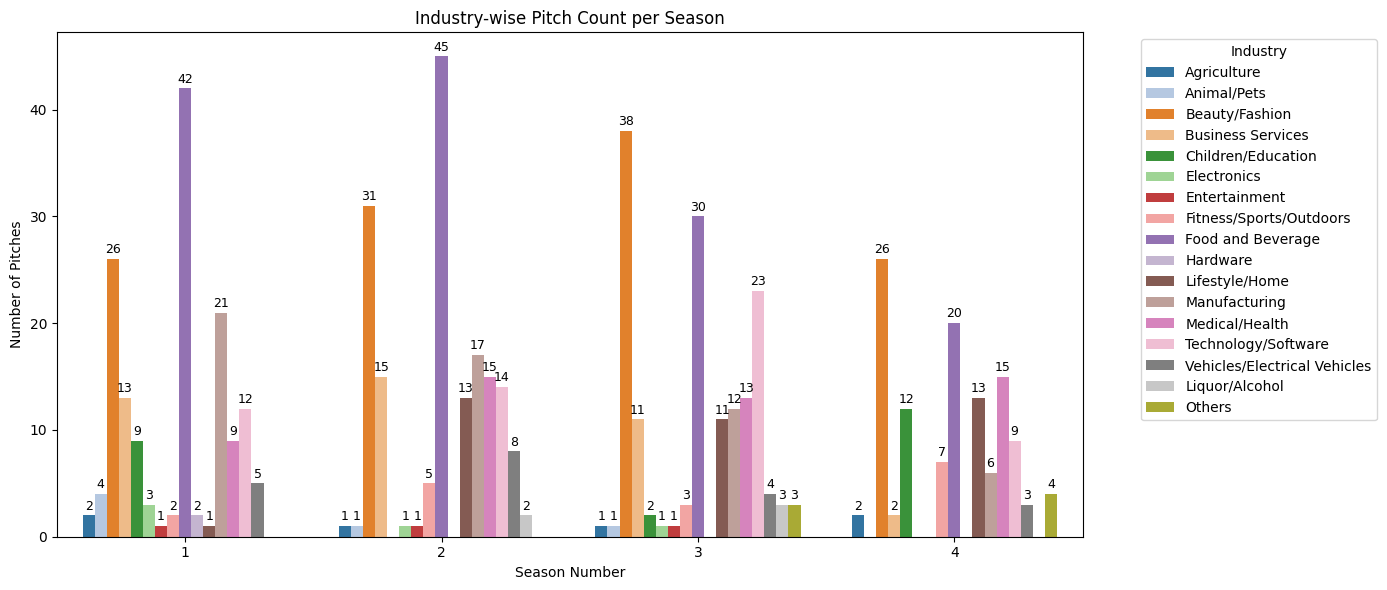

In [ ]:
# Group data
grouped = df.groupby(['Season Number', 'Industry']).size().reset_index(name='Pitch Count')

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=grouped, x='Season Number', y='Pitch Count', hue='Industry', palette='tab20')

# Add pitch count labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

plt.title('Industry-wise Pitch Count per Season')
plt.xlabel('Season Number')
plt.ylabel('Number of Pitches')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')  # moves legend outside
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

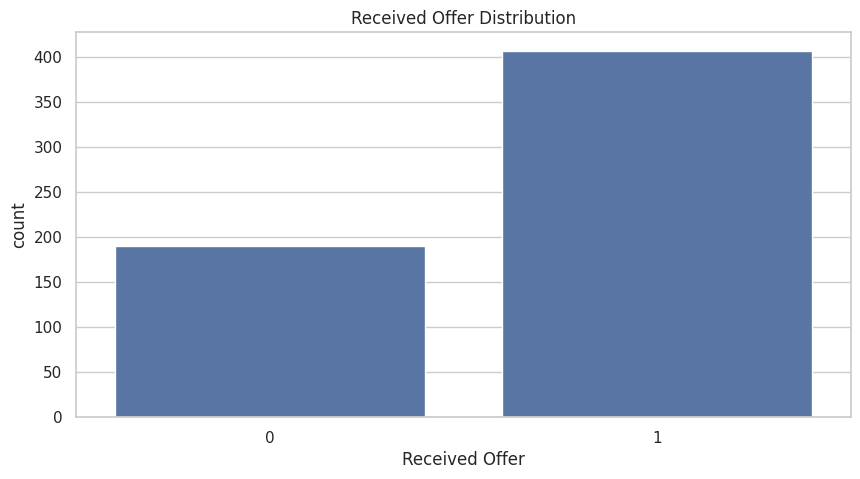

Received Offer
1    68%
0    32%
Name: proportion, dtype: object 



In [ ]:
#  Check target column distribution - Received Offer
sns.countplot(data=df, x='Received Offer')
plt.title('Received Offer Distribution')
plt.show()
print(round(df['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")


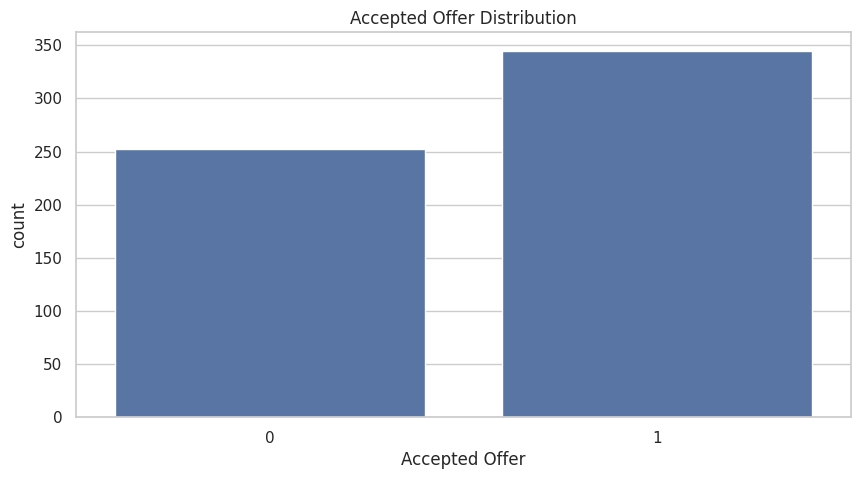

Accepted Offer
1    58%
0    42%
Name: proportion, dtype: object 



In [ ]:

sns.countplot(data=df, x='Accepted Offer')
plt.title('Accepted Offer Distribution')
plt.show()
print(round(df['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")

Number of Sharks in Deal
0.0    252
1.0    154
2.0    105
3.0     48
4.0     20
5.0     18
Name: count, dtype: int64 

Number of Sharks in Deal
0.0    42%
1.0    26%
2.0    18%
3.0     8%
4.0     3%
5.0     3%
Name: proportion, dtype: object


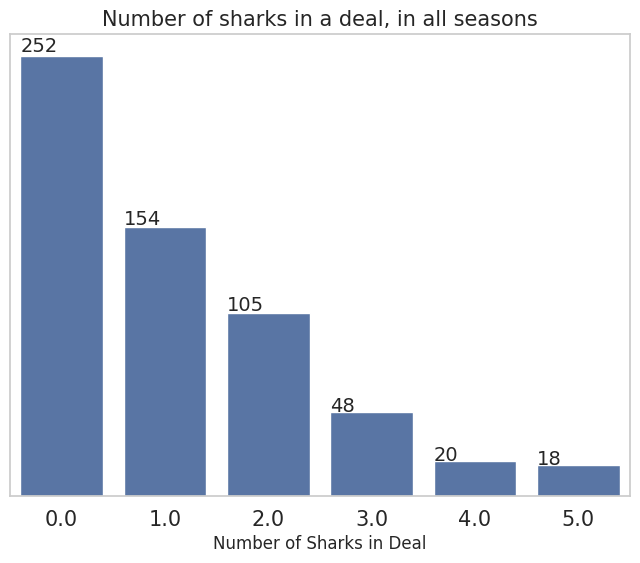

In [ ]:
# Number of sharks in a deal, in all seasons
print(df['Number of Sharks in Deal'].value_counts(), "\n")

# In percentage
print(round(df['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(8, 6))
plt.title("Number of sharks in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = df, x = 'Number of Sharks in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01), size=14)

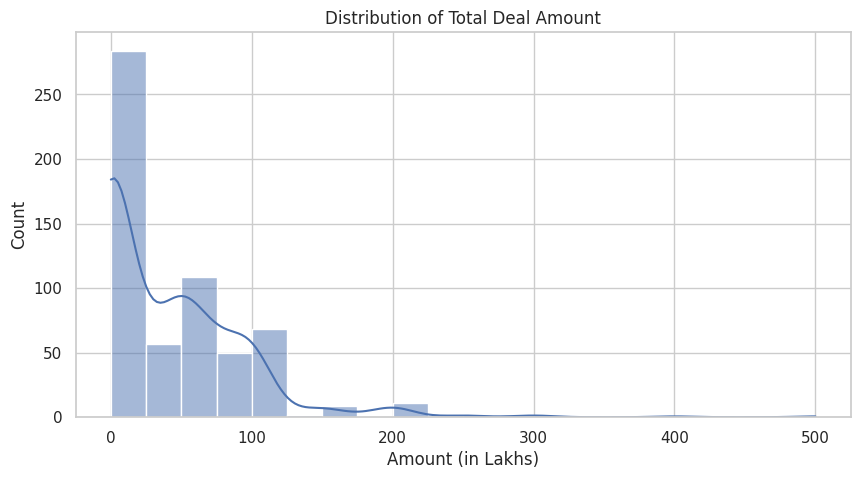

In [ ]:
sns.histplot(df['Total Deal Amount'].dropna(), bins=20, kde=True)
plt.title('Distribution of Total Deal Amount')
plt.xlabel('Amount (in Lakhs)')
plt.ylabel('Count')
plt.show()
plt.show()

In [ ]:
print("Total pitchers -", int(df['Number of Presenters'].sum()), "\n")
print("")
print("Total male pitchers -", int(df['Male Presenters'].sum()), "\n")
print("Total female pitchers -", int(df['Female Presenters'].sum()), "\n")
print("Total transgender pitchers -", int(df['Transgender Presenters'].sum()), "\n")

Total pitchers - 1198 


Total male pitchers - 863 

Total female pitchers - 332 

Total transgender pitchers - 3 



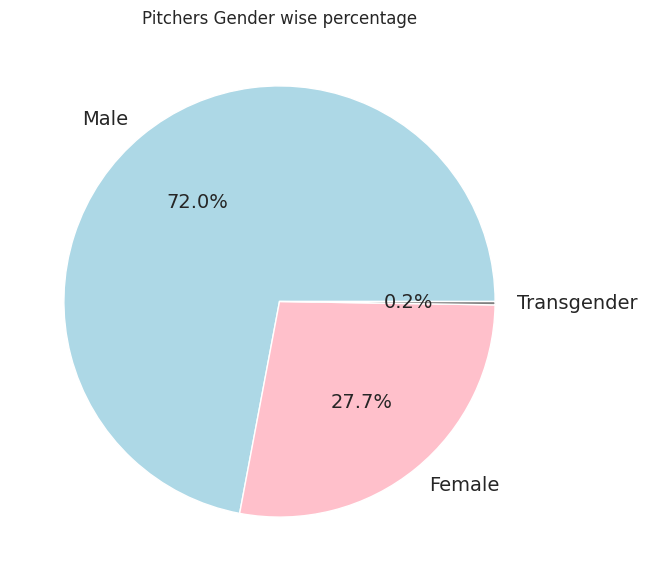

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.title("Pitchers Gender wise percentage")
plt.pie([round(df['Male Presenters'].sum()/df['Number of Presenters'].sum()*100, 2), round(df['Female Presenters'].sum()/df['Number of Presenters'].sum()*100, 2), round(df['Transgender Presenters'].sum()/df['Number of Presenters'].sum()*100, 2)], labels = ["Male","Female","Transgender"], autopct='%.1f%%', colors=["lightblue", "pink", "gray"], textprops={'fontsize': 14})
plt.show()

In [ ]:
print(df['Pitchers Average Age'].value_counts(),"\n")

Pitchers Average Age
Middle    448
Young     144
Old         5
Name: count, dtype: int64 



In [ ]:
print("Sum of investment amount asked, by all startup companies, in Indian Shark Tank -", format_currency(df['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

Sum of investment amount asked, by all startup companies, in Indian Shark Tank - ₹786.03 crores


In [ ]:
# Amount invested by all sharks, in India SharkTank
print("Amount invested by all sharks, in Shark Tank India -", format_currency(df['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

Amount invested by all sharks, in Shark Tank India - ₹249.84 crores


In [ ]:
# Number of investments with more than 1cr amount
print(df[df['Total Deal Amount']>=100]["Startup Name"].count())

97


In [ ]:
# Top 20 investments, as per total investment/deal amount (in crores)
high_invest = df.sort_values('Total Deal Amount', ascending=False)[0:20]
high_invest['Total Deal Amount'] = high_invest['Total Deal Amount']/100
print(high_invest.groupby('Startup Name')['Total Deal Amount'].max().nlargest(20))

Startup Name
NOOE                         5.00
TheNaturikCo                 4.00
CultureCircle                3.00
NasherMiles                  3.00
WeHear                       2.50
KIWIKisanWindow              2.50
BurgerBae                    2.00
Canvaloop                    2.00
DilFoods                     2.00
HealthFab                    2.00
JewelBox                     2.00
GoenchiFeni                  2.00
SpeedKitchen                 2.00
MeduLance                    2.00
Pharmallama                  2.00
Refit                        2.00
UnStop                       2.00
RahejaSolarFoodProcessing    1.75
Metashot                     1.60
Snitch                       1.50
Name: Total Deal Amount, dtype: float64


In [ ]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", df['Royalty Percentage'].value_counts()[1],"\n")

df.loc[df['Royalty Percentage'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Royalty Percentage","Royalty Recouped Amount"]]

Number of startups who gave Royalty 14 



,Season Number,Startup Name,Total Deal Amount,Total Deal Equity,Royalty Percentage,Royalty Recouped Amount
321,3,HonestHome,100.0,3.00,1.0,150.00
322,3,AdilQadri,100.0,1.00,1.0,100.00
342,3,Tiggle,50.0,20.00,2.0,100.00
351,3,GudGum,80.0,10.00,4.0,80.00
362,3,DecodeAge,100.0,2.25,1.0,150.00
365,3,NasherMiles,300.0,1.50,1.0,300.00
369,3,VOLD,10.0,10.00,3.0,40.00
375,3,YesMadam,150.0,2.00,2.0,150.00
378,3,PushSports,80.0,4.00,2.0,160.00
385,3,Refit,200.0,1.00,1.0,300.00


In [ ]:
print("Number of startups who accepted conditional deals", df['Deal Has Conditions'].value_counts()[1],"\n")

df.loc[df['Deal Has Conditions'] == 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 35 



,Season Number,Startup Name,Total Deal Amount,Total Deal Equity
8,1,NOCD,20.0,15.00
29,1,Meatyour,30.0,20.00
32,1,ARRCOATSurfaceTextures,50.0,15.00
44,1,PNTRobotics,25.0,25.00
79,1,PawsIndia,50.0,15.00
82,1,IsakFragrances,50.0,50.00
105,1,GrowFitter,50.0,2.00
224,2,Amore,75.0,7.50
238,2,CloudWorx,40.0,3.20
242,2,Daryaganj,90.0,1.00


In [ ]:
# Startup that rejected the offers
df.loc[df['Accepted Offer']==0, ["Startup Name","Industry","Original Ask Amount","Original Offered Equity"]]

,Startup Name,Industry,Original Ask Amount,Original Offered Equity
4,HeadAndHeart,Children/Education,50.0,5.00
5,Agritourism,Agriculture,50.0,5.00
6,qZenseLabs,Food and Beverage,100.0,0.25
13,HungryHead,Food and Beverage,50.0,5.00
14,ShrawaniEngineers,Beauty/Fashion,20.0,10.00
...,...,...,...,...
586,PanchalDairy,Food and Beverage,20.0,10.00
587,MusicPandit,Children/Education,50.0,1.00
592,KaviThePoetry-ArtProject,Others,60.0,1.50
594,SugarStrings.ai,Medical/Health,100.0,2.50


In [ ]:
#rejected offers from different industries

decline=df.loc[df['Accepted Offer']==0, ["Industry"]]
decline_offer=round(decline.value_counts(normalize=True)*100,2)
decline_offer

,proportion
Industry,
Food and Beverage,22.62
Beauty/Fashion,19.44
Manufacturing,10.71
Business Services,9.13
Lifestyle/Home,8.73
Technology/Software,8.73
Medical/Health,5.16
Vehicles/Electrical Vehicles,3.97
Children/Education,3.17


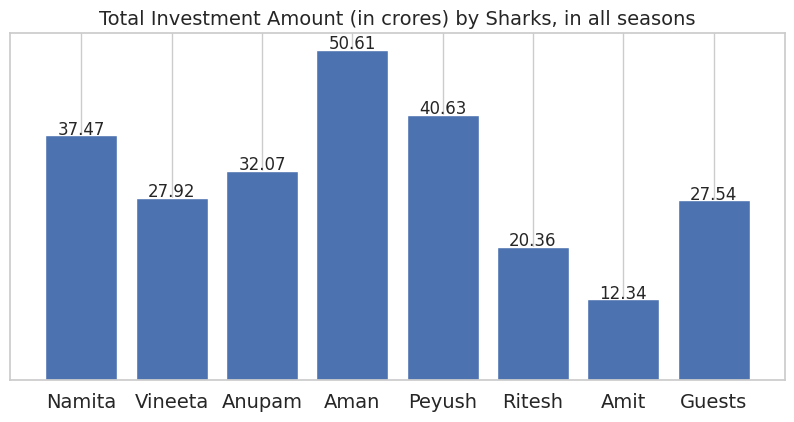

In [ ]:
# Amount Invested by sharks, in all seasons
Amount = [df['Namita Investment Amount'].sum()/100, df['Vineeta Investment Amount'].sum()/100, df['Anupam Investment Amount'].sum()/100,
    df['Aman Investment Amount'].sum()/100, df['Peyush Investment Amount'].sum()/100, df['Ritesh Investment Amount'].sum()/100, df['Amit Investment Amount'].sum()/100, df['Guest Investment Amount'].sum()/100]
name=['Namita','Vineeta','Anupam','Aman','Peyush','Ritesh','Amit','Guests']
df1 = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4.5))
plt.bar(df1['Name'], df1['Total Amount'])
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+0.1, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount (in crores) by Sharks, in all seasons", fontsize=14)
plt.show()

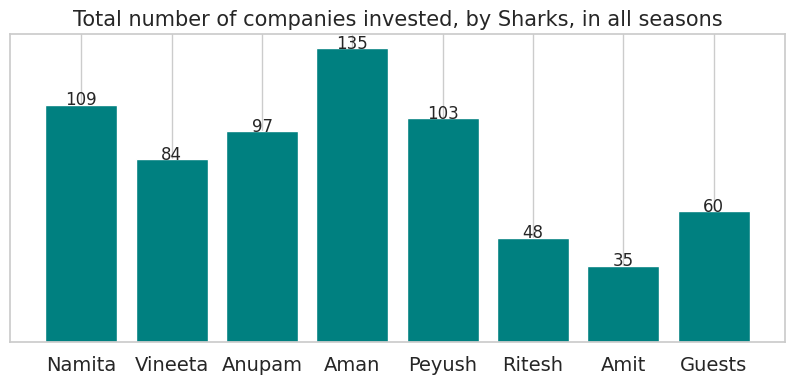

In [ ]:

## Number of companies invested, in all seasons

Amount = [597-df['Namita Investment Amount'].value_counts()[0], 597-df['Vineeta Investment Amount'].value_counts()[0], 597-df['Anupam Investment Amount'].value_counts()[0],
    597-df['Aman Investment Amount'].value_counts()[0],597- df['Peyush Investment Amount'].value_counts()[0],597- df['Ritesh Investment Amount'].value_counts()[0],597- df['Amit Investment Amount'].value_counts()[0], 597-df['Guest Investment Amount'].value_counts()[0]]
df2 = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df2['Name'], df2['Total Amount'], color='teal')
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested, by Sharks, in all seasons", fontsize=15)
plt.show()

# ** Namita's Investments 🦈**



Total investments by Namita 109
Investment amount by Namita 37.47 crores
Equity received by Namita 389.93 % in different companies
Debt/loan amount by Namita 6.59 crores

Company details:
---------------------------------------------------------------------------
       Startup Name                Industry  Namita Investment Amount
        JhaJiAchaar       Food and Beverage                 28.300000
             Bummer          Beauty/Fashion                 37.500000
      SkippiIcePops       Food and Beverage                 20.000000
       Menstrupedia      Children/Education                 50.000000
              Altor           Manufacturing                 25.000000
            Nuutjob          Beauty/Fashion                  8.330000
              Farda          Beauty/Fashion                 15.000000
               Auli          Beauty/Fashion                 75.000000
              Annie      Children/Education                 35.000000
    TheRenalProject          Medical

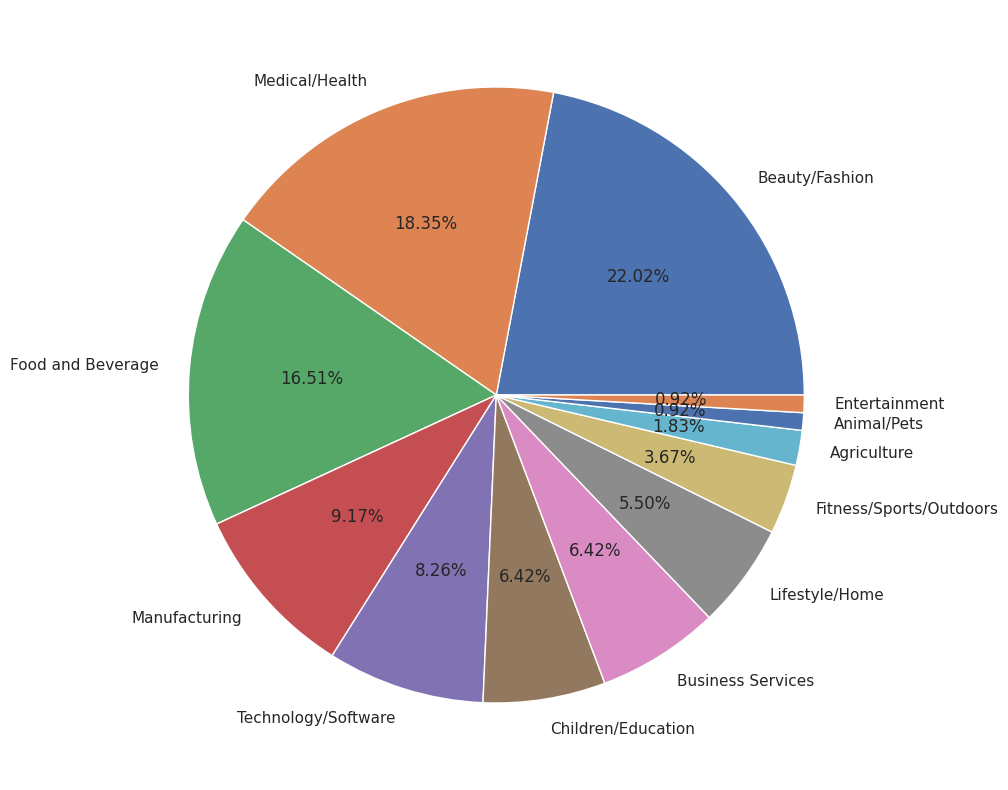

In [ ]:
print("Total investments by Namita", 597-df['Namita Investment Amount'].value_counts()[0])
print("Investment amount by Namita", round(df['Namita Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Namita", round(df['Namita Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Namita", round(df['Namita Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(df.loc[df['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nNamita industry wise investments\n")
print(df[df['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (20,10))
df[df['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

# **Anupam's Investments 🦈**

Total investments by Anupam 97
Investment amount by Anupam 32.07 crores
Equity received by Anupam 461.67 % in different companies
Debt/loan amount by Anupam 2.2 crores

Company details:
-------------------------------------------------------------------------------------
                 Startup Name                     Industry  Anupam Investment Amount
                BluePineFoods            Food and Beverage                  0.000000
                 BoozScooters Vehicles/Electrical Vehicles                  0.000000
             HeartUpMySleeves               Beauty/Fashion                 12.500000
                    TagzFoods            Food and Beverage                  0.000000
                 HeadAndHeart           Children/Education                  0.000000
                  Agritourism                  Agriculture                  0.000000
                   qZenseLabs            Food and Beverage                  0.000000
                    Peeschute               Beau

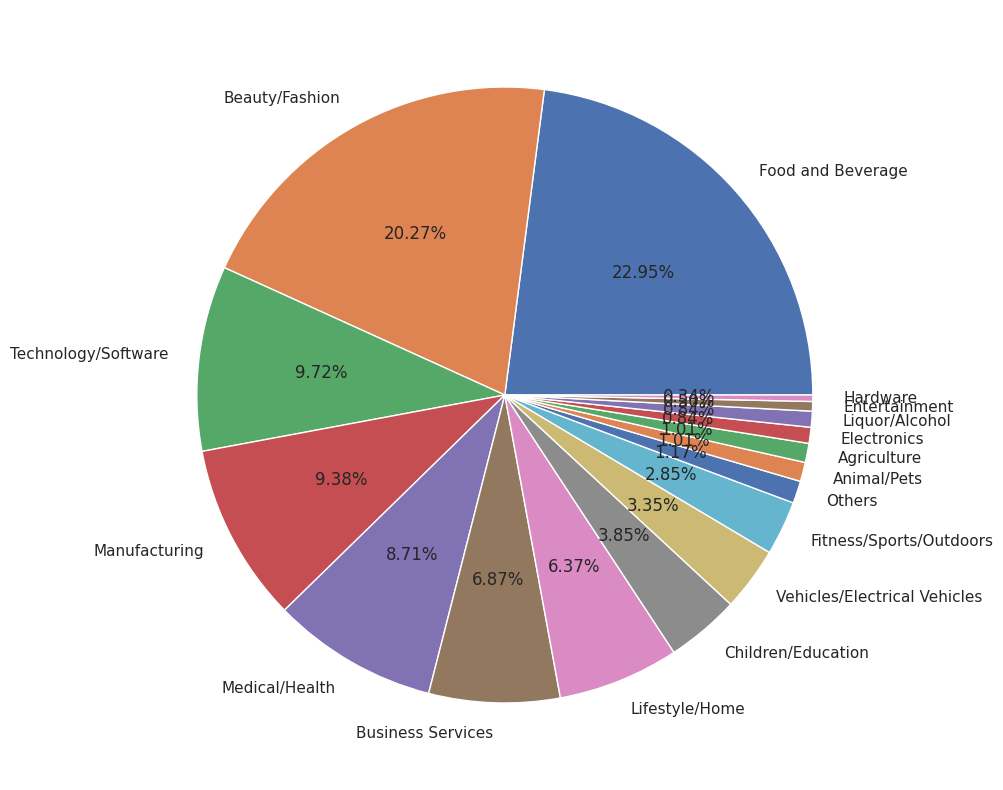

In [ ]:
print("Total investments by Anupam",  597-df['Anupam Investment Amount'].value_counts()[0])
print("Investment amount by Anupam", round(df['Anupam Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Anupam", round(df['Anupam Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Anupam", round(df['Anupam Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*85)
print(df.loc[df['Anupam Investment Amount']>=0][["Startup Name","Industry","Anupam Investment Amount"]].to_string(index=False))
print('-'*85)

print("\nAnupam industry wise investments\n")
print(df[df['Anupam Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (20,10))
df[df['Anupam Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()


# **Vineeta's Investments 🦈**

Total investments by Vineeta 84
Investment amount by Vineeta 27.92 crores
Equity received by Vineeta 318.27 % in different companies
Debt/loan amount by Vineeta 3.61 crores

Company details:
---------------------------------------------------------------------------
             Startup Name                     Industry  Vineeta Investment Amount
            BluePineFoods            Food and Beverage                    25.0000
             BoozScooters Vehicles/Electrical Vehicles                    20.0000
         HeartUpMySleeves               Beauty/Fashion                    12.5000
                     NOCD            Food and Beverage                    20.0000
                    CosIQ               Beauty/Fashion                    25.0000
              JhaJiAchaar            Food and Beverage                    28.3000
            SkippiIcePops            Food and Beverage                    20.0000
               Get-A-Whey            Food and Beverage                    33.

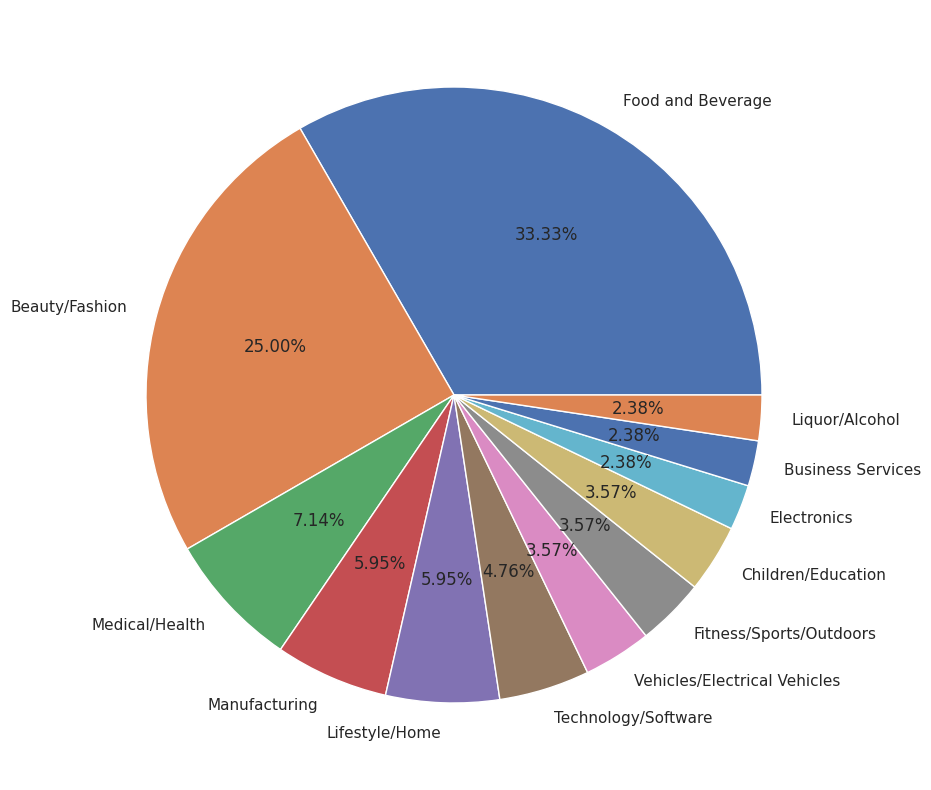

In [ ]:
print("Total investments by Vineeta", 597-df['Vineeta Investment Amount'].value_counts()[0])
print("Investment amount by Vineeta", round(df['Vineeta Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Vineeta", round(df['Vineeta Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Vineeta", round(df['Vineeta Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(df.loc[df['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nVineeta industry wise investments\n")
print(df[df['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (20,10))
df[df['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

# ** Aman Gupta's Investments 🦈**

Total investments by Aman 135
Investment amount by Aman 50.61 crores
Equity received by Aman 416.31 % in different companies
Debt/loan amount by Aman 7.23 crores

Company details:
---------------------------------------------------------------------------
                 Startup Name                     Industry  Aman Investment Amount
                BluePineFoods            Food and Beverage               25.000000
                 BoozScooters Vehicles/Electrical Vehicles                0.000000
             HeartUpMySleeves               Beauty/Fashion                0.000000
                    TagzFoods            Food and Beverage                0.000000
                 HeadAndHeart           Children/Education                0.000000
                  Agritourism                  Agriculture                0.000000
                   qZenseLabs            Food and Beverage                0.000000
                    Peeschute               Beauty/Fashion               75.0000

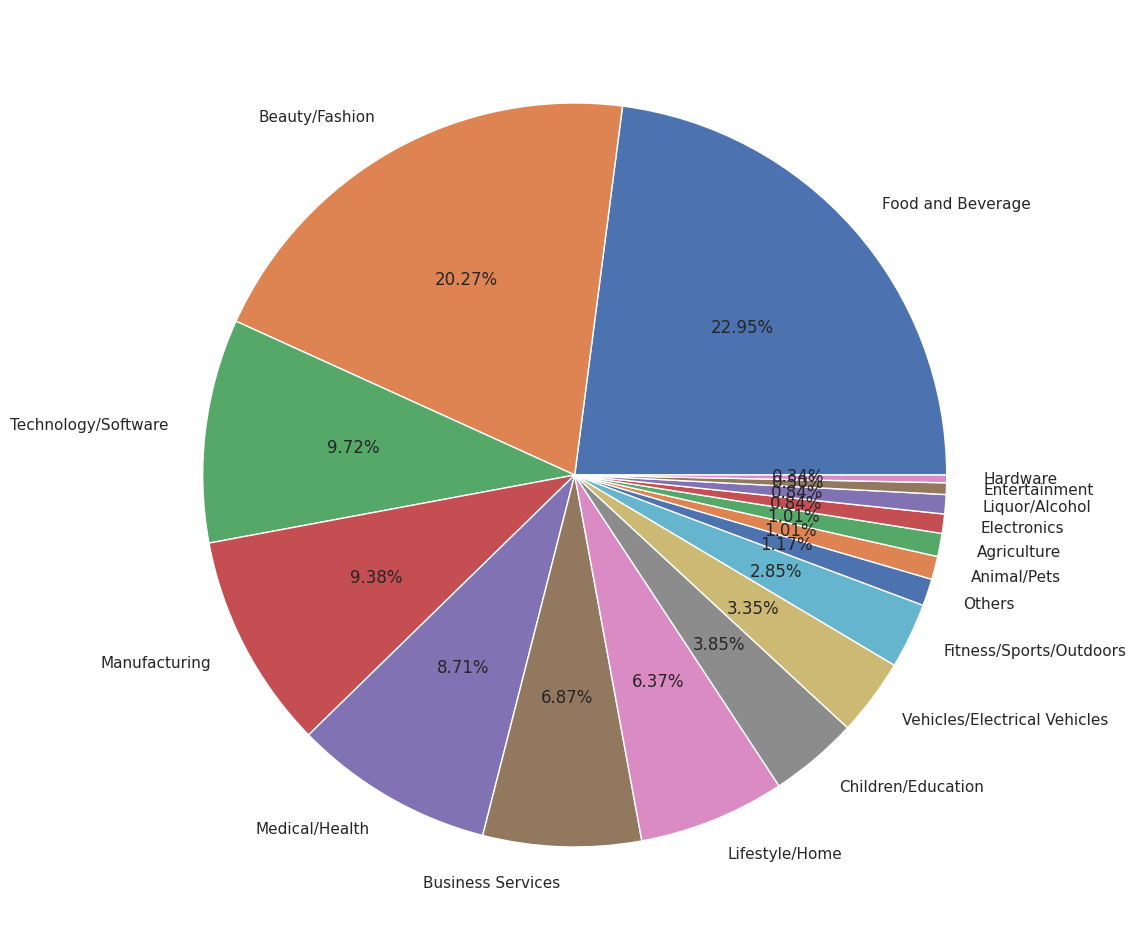

In [ ]:
print("Total investments by Aman",597-df['Aman Investment Amount'].value_counts()[0])
print("Investment amount by Aman", round(df['Aman Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Aman", round(df['Aman Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Aman", round(df['Aman Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(df.loc[df['Aman Investment Amount']>=0][["Startup Name","Industry","Aman Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAman industry wise investments\n")
print(df[df['Aman Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (12,15))
df[df['Aman Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()


# **Peyush Bansal's Investments 🦈**

Total investments by Peyush 103
Investment amount by Peyush 40.63 crores
Equity received by Peyush 595.93 % in different companies
Debt/loan amount by Peyush 3.72 crores

Company details:
---------------------------------------------------------------------------
                 Startup Name                     Industry  Peyush Investment Amount
                BluePineFoods            Food and Beverage                  0.000000
                 BoozScooters Vehicles/Electrical Vehicles                  0.000000
             HeartUpMySleeves               Beauty/Fashion                  0.000000
                    TagzFoods            Food and Beverage                  0.000000
                 HeadAndHeart           Children/Education                  0.000000
                  Agritourism                  Agriculture                  0.000000
                   qZenseLabs            Food and Beverage                  0.000000
                    Peeschute               Beauty/Fashi

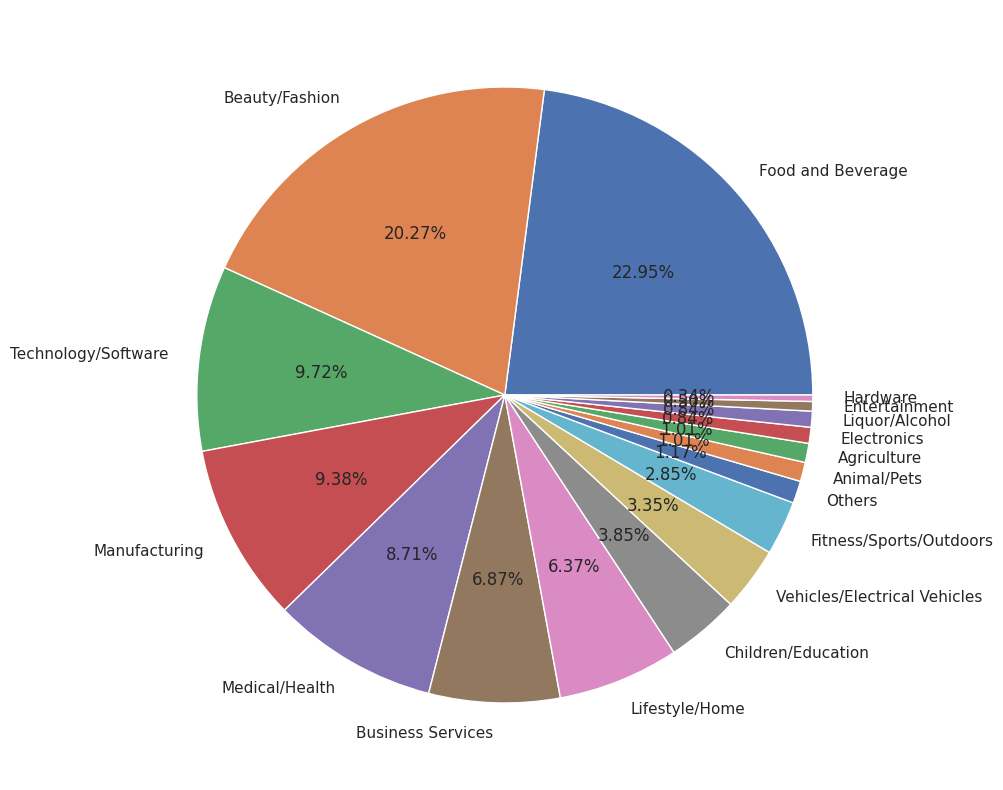

In [ ]:
print("Total investments by Peyush", 597-df['Peyush Investment Amount'].value_counts()[0])
print("Investment amount by Peyush", round(df['Peyush Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Peyush", round(df['Peyush Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Peyush", round(df['Peyush Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(df.loc[df['Peyush Investment Amount']>=0][["Startup Name","Industry","Peyush Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nPeyush industry wise investments\n")
print(df[df['Peyush Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,10))
df[df['Peyush Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

# **Ritesh Aggarwal's Investments 🦈**

Total investments by Ritesh 48
Investment amount by Ritesh 20.36 crores
Equity received by Ritesh 108.49 % in different companies
Debt/loan amount by Ritesh 5.63 crores

Company details:
---------------------------------------------------------------------------
                 Startup Name                     Industry  Ritesh Investment Amount
                BluePineFoods            Food and Beverage                    0.0000
                 BoozScooters Vehicles/Electrical Vehicles                    0.0000
             HeartUpMySleeves               Beauty/Fashion                    0.0000
                    TagzFoods            Food and Beverage                    0.0000
                 HeadAndHeart           Children/Education                    0.0000
                  Agritourism                  Agriculture                    0.0000
                   qZenseLabs            Food and Beverage                    0.0000
                    Peeschute               Beauty/Fashio

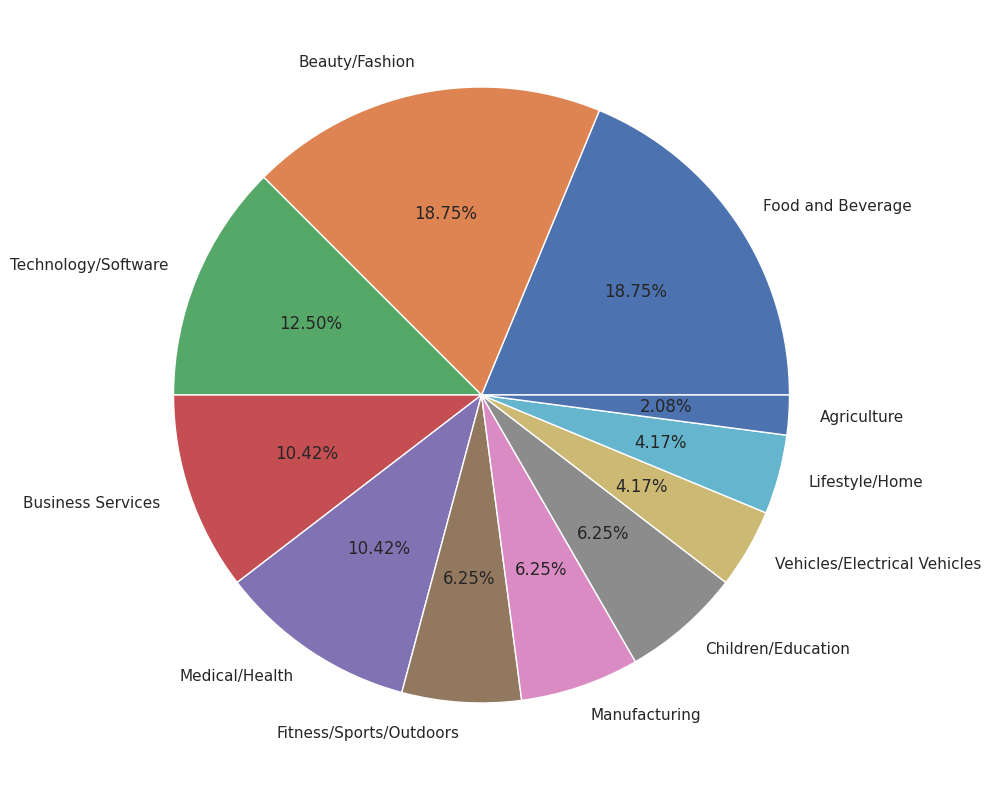

In [ ]:
print("Total investments by Ritesh", 597-df['Ritesh Investment Amount'].value_counts()[0])
print("Investment amount by Ritesh", round(df['Ritesh Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ritesh", round(df['Ritesh Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ritesh", round(df['Ritesh Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(df.loc[df['Ritesh Investment Amount']>=0][["Startup Name","Industry","Ritesh Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRitesh industry wise investments\n")
print(df[df['Ritesh Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,10))
df[df['Ritesh Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

# **Amit Jain's Investments 🦈**

Total investments by Amit 35
Investment amount by Amit 12.34 crores
Equity received by Amit 150.05 % in different companies
Debt/loan amount by Amit 2.45 crores

Company details:
---------------------------------------------------------------------------
 Startup Name                     Industry  Amit Investment Amount
    InsideFPV                Manufacturing                   18.75
    Angrakhaa               Beauty/Fashion                   40.00
    MoppFoods            Food and Beverage                   75.00
       Dobiee            Food and Beverage                   72.00
        Pflow               Medical/Health                   30.00
       ekatra               Lifestyle/Home                   10.00
    licksters            Food and Beverage                   25.00
   ScrapUncle            Business Services                   60.00
       UnStop          Technology/Software                   50.00
  Cakelicious            Food and Beverage                   25.00
     Hor

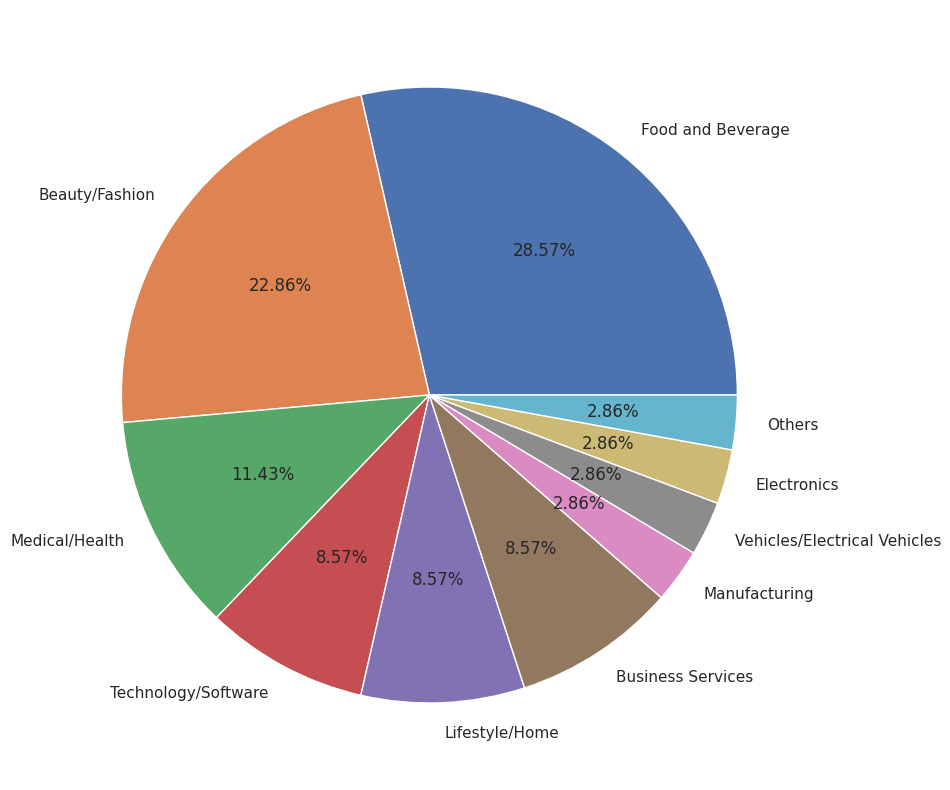

In [ ]:
print("Total investments by Amit", 597-df['Amit Investment Amount'].value_counts()[0])
print("Investment amount by Amit", round(df['Amit Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Amit", round(df['Amit Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Amit", round(df['Amit Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(df.loc[df['Amit Investment Amount']>0][["Startup Name","Industry","Amit Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAmit industry wise investments\n")
print(df[df['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,10))
df[df['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

In [ ]:
    convert_to_rupee=["Yearly Revenue","Monthly Sales","Original Ask Amount", "Deal Valuation","Valuation Requested","Total Deal Amount","Total Deal Debt","Royalty Recouped Amount","Namita Investment Amount","Vineeta Investment Amount","Anupam Investment Amount","Aman Investment Amount","Peyush Investment Amount","Ritesh Investment Amount","Amit Investment Amount","Guest Investment Amount","Namita Debt Amount",
                  "Vineeta Debt Amount","Anupam Debt Amount","Aman Debt Amount","Peyush Debt Amount","Ritesh Debt Amount","Amit Debt Amount","Guest Debt Amount"]
    for col in convert_to_rupee:
       df[col]=df[col]/100

In [ ]:
df["Yearly Revenue"]

,Yearly Revenue
0,0.95
1,0.04
2,2.42
3,7.00
4,0.30
...,...
592,3.56
593,9.24
594,2.42
595,12.50


In [ ]:
df.to_csv('Cleaned_Shark_Tank_India.csv', index=False)

In [ ]:
from google.colab import files
files.download('Cleaned_Shark_Tank_India.csv' )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>